Dowload GEE pre-processed satellite data from : https://code.earthengine.google.com/?accept_repo=users/monidhoni07/GIS_prj

In [1]:
import os
import pandas as pd

# Specify the folder containing the CSV files
folder_path = '/kaggle/input/smog-time/GIS_TIME'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold DataFrames
dataframes = []

# Iterate through the CSV files and read them into pandas DataFrames
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # Read CSV into DataFrame
    dataframes.append(df)       # Add to the list

# Concatenate all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df.head()

,system:index,max_AOD_055,month,year,.geo,date
0,MCD19A2_A2014060_h15v17_061_2023060073136_01,NaN,3,2014,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
1,MCD19A2_A2014060_h15v17_061_2023060073136_02,NaN,3,2014,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
2,MCD19A2_A2014060_h15v17_061_2023060073136_03,NaN,3,2014,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
3,MCD19A2_A2014060_h15v17_061_2023060073136_04,NaN,3,2014,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
4,MCD19A2_A2014060_h15v17_061_2023060073136_05,NaN,3,2014,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN


In [4]:
df = df[["month", "year","max_AOD_055"]]

In [5]:
df.head()

,month,year,max_AOD_055
0,3,2014,NaN
1,3,2014,NaN
2,3,2014,NaN
3,3,2014,NaN
4,3,2014,NaN


In [6]:
df.rename(columns={'max_AOD_055':'Mean_AOD'}, inplace=True)

In [7]:
df.head()

,month,year,Mean_AOD
0,3,2014,NaN
1,3,2014,NaN
2,3,2014,NaN
3,3,2014,NaN
4,3,2014,NaN


In [8]:
df.count()

month       306036
year        306036
Mean_AOD      7931
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.count()

month       7931
year        7931
Mean_AOD    7931
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.count()

month       7225
year        7225
Mean_AOD    7225
dtype: int64

In [13]:
print(df['year'].value_counts())
print(df['month'].value_counts())

year
2022    921
2015    732
2014    696
2019    679
2021    660
2020    659
2024    621
2023    603
2018    556
2017    555
2016    543
Name: count, dtype: int64
month
3     885
5     811
1     801
4     776
2     751
10    686
9     557
6     540
11    443
12    406
8     322
7     247
Name: count, dtype: int64


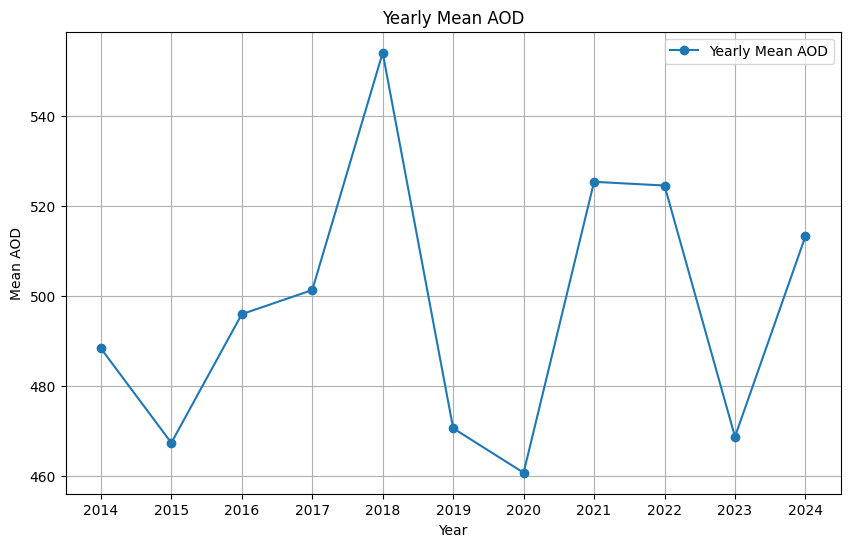

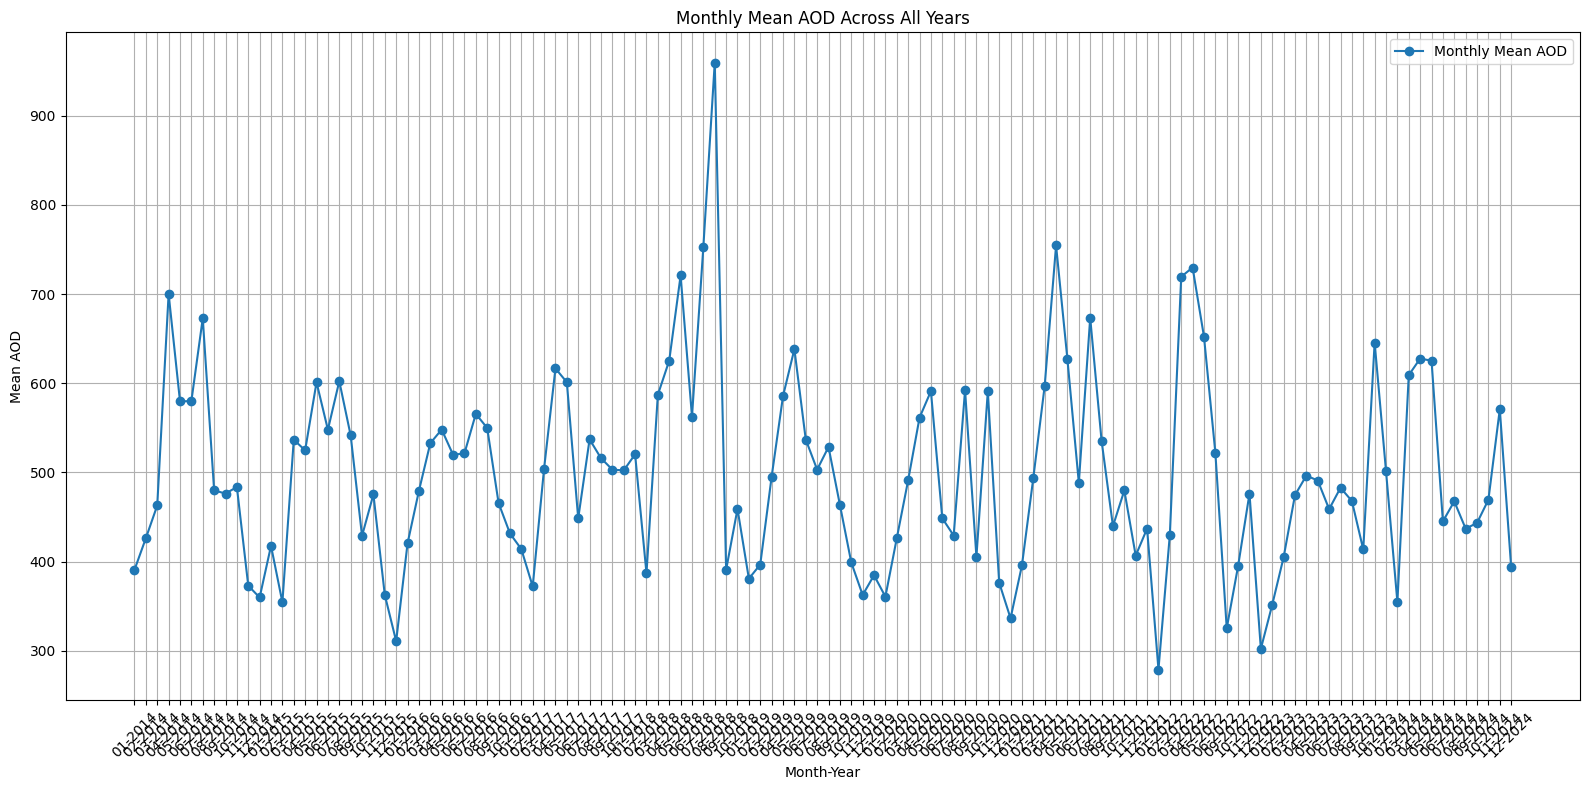

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` has columns: 'year', 'month', 'Mean_AOD'

# Combine rows with the same month-year combination by averaging
df['month_year'] = df['month'].astype(str).str.zfill(2) + '-' + df['year'].astype(str)
df_monthly_avg = df.groupby(['year', 'month'])['Mean_AOD'].mean().reset_index()

# 1. Plot: Yearly Averages
yearly_data = df.groupby('year')['Mean_AOD'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['Mean_AOD'], marker='o', label='Yearly Mean AOD')
plt.title('Yearly Mean AOD')
plt.xlabel('Year')
plt.ylabel('Mean AOD')
plt.grid(True)
plt.xticks(yearly_data['year'])  # Ensure all years are shown
plt.legend()
plt.show()

# 2. Plot: Monthly Averages by Year
# Combine year and month into a single "month-year" column as a string
df_monthly_avg['month_year'] = df_monthly_avg['month'].astype(str).str.zfill(2) + '-' + df_monthly_avg['year'].astype(str)

plt.figure(figsize=(16, 8))  # Larger plot for monthly data
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['Mean_AOD'], marker='o', label='Monthly Mean AOD')
plt.title('Monthly Mean AOD Across All Years')
plt.xlabel('Month-Year')
plt.ylabel('Mean AOD')
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

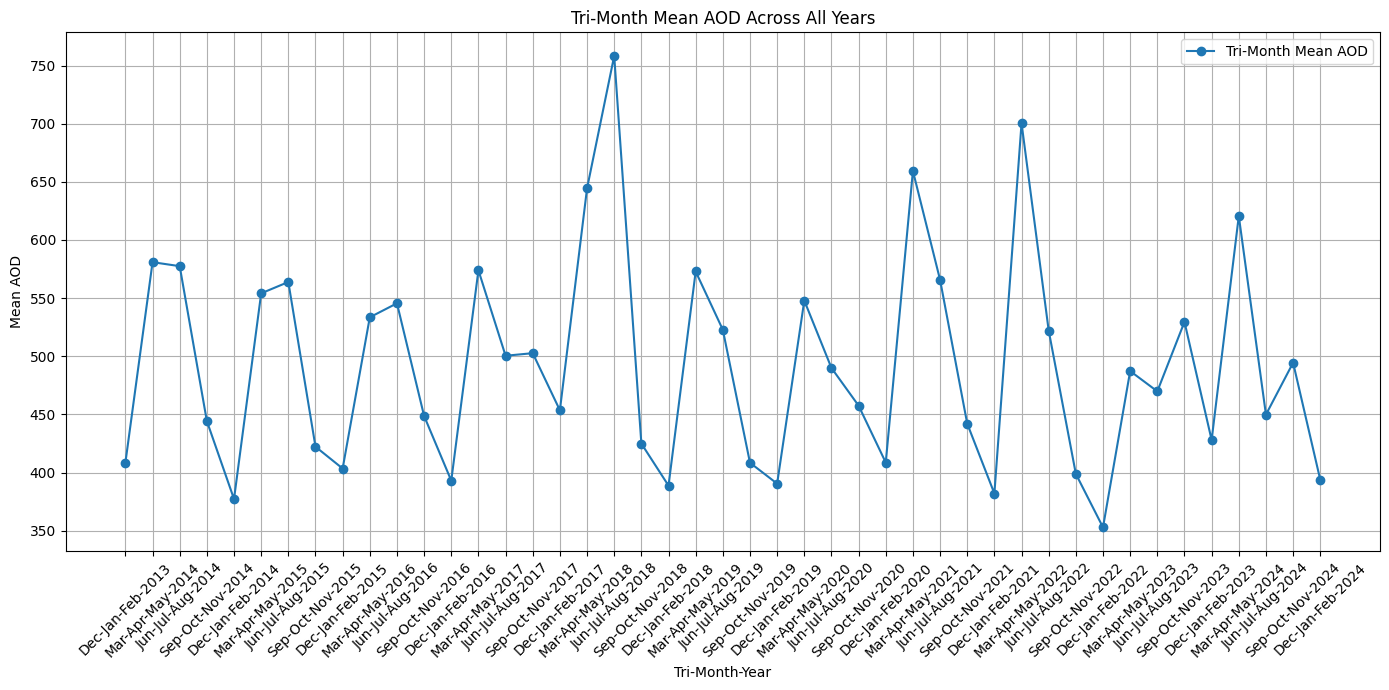

In [15]:
# Combine rows with the same month-year combination by averaging
df['month_year'] = df['month'].astype(str).str.zfill(2) + '-' + df['year'].astype(str)
df_monthly_avg = df.groupby(['year', 'month'])['Mean_AOD'].mean().reset_index()

# Create a tri-month grouping with the specified labels
tri_month_group_labels = {
    1: "Mar-Apr-May",
    2: "Jun-Jul-Aug",
    3: "Sep-Oct-Nov",
    4: "Dec-Jan-Feb"
}

# Map months to tri-month groups
def get_tri_month_group(month):
    if month in [3, 4, 5]:  # Mar-Apr-May
        return 1
    elif month in [6, 7, 8]:  # Jun-Jul-Aug
        return 2
    elif month in [9, 10, 11]:  # Sep-Oct-Nov
        return 3
    else:  # Dec-Jan-Feb
        return 4

df_monthly_avg['tri_month_group'] = df_monthly_avg['month'].apply(get_tri_month_group)

# Adjust year for "Dec-Jan-Feb" group (Jan and Feb belong to the previous year's tri-month group)
df_monthly_avg.loc[(df_monthly_avg['month'].isin([1, 2])), 'year'] -= 1

# Group data by year and tri-month group and calculate mean
df_trim_month_avg = df_monthly_avg.groupby(['year', 'tri_month_group'])['Mean_AOD'].mean().reset_index()

# Create labels for tri-month groups
df_trim_month_avg['group_label'] = df_trim_month_avg['tri_month_group'].map(tri_month_group_labels) + '-' + df_trim_month_avg['year'].astype(str)

# Plotting the tri-month averages
plt.figure(figsize=(14, 7))
plt.plot(df_trim_month_avg['group_label'], df_trim_month_avg['Mean_AOD'], marker='o', label='Tri-Month Mean AOD')
plt.title('Tri-Month Mean AOD Across All Years')
plt.xlabel('Tri-Month-Year')
plt.ylabel('Mean AOD')
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your data into a DataFrame `df` with columns 'year', 'month', 'Mean_AOD'

# Combine rows for the same year by averaging
yearly_data = df.groupby('year')['Mean_AOD'].mean().reset_index()

# Combine rows for the same month across all years by averaging
monthly_data = df.groupby(['year', 'month'])['Mean_AOD'].mean().reset_index()

# Prepare tri-month data as before
tri_month_group_labels = {
    1: "Mar-Apr-May",
    2: "Jun-Jul-Aug",
    3: "Sep-Oct-Nov",
    4: "Dec-Jan-Feb"
}

def get_tri_month_group(month):
    if month in [3, 4, 5]: return 1
    elif month in [6, 7, 8]: return 2
    elif month in [9, 10, 11]: return 3
    else: return 4

monthly_data['tri_month_group'] = monthly_data['month'].apply(get_tri_month_group)
monthly_data.loc[(monthly_data['month'].isin([1, 2])), 'year'] -= 1

tri_month_data = monthly_data.groupby(['year', 'tri_month_group'])['Mean_AOD'].mean().reset_index()

--- Yearly Data ---
ADF Statistic: -3.4577672414661835
p-value: 0.009140323186731997
Critical Value 1%: -4.9386902332361515
Critical Value 5%: -3.477582857142857
Critical Value 10%: -2.8438679591836733


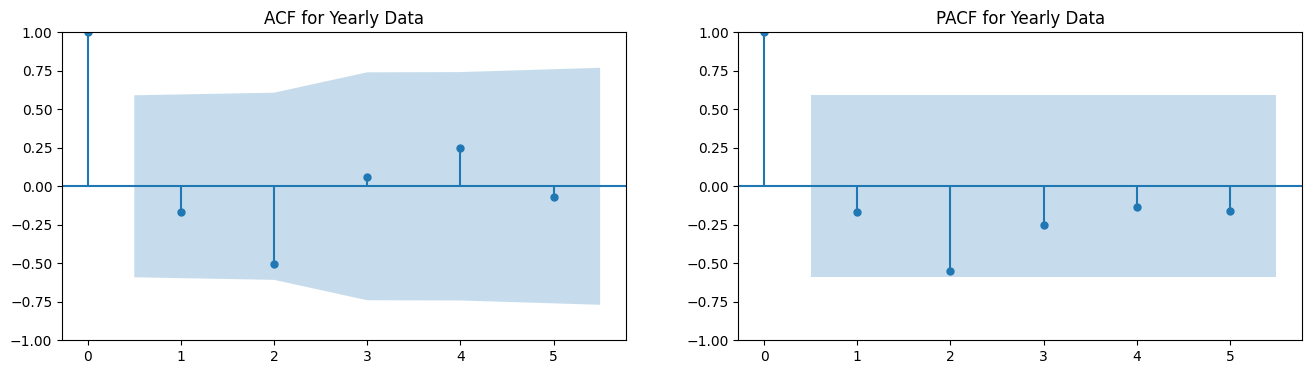

--- Monthly Data ---
ADF Statistic: -6.930752692759372
p-value: 1.0857005557130834e-09
Critical Value 1%: -3.4870216863700767
Critical Value 5%: -2.8863625166643136
Critical Value 10%: -2.580009026141913


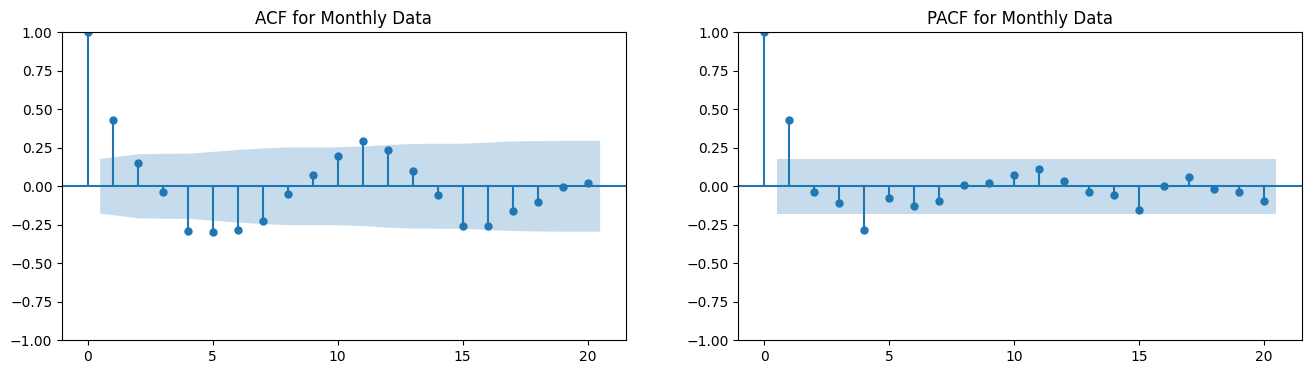

--- Tri-Month Data ---
ADF Statistic: -2.846708473357537
p-value: 0.051905314945584376
Critical Value 1%: -3.626651907578875
Critical Value 5%: -2.9459512825788754
Critical Value 10%: -2.6116707716049383


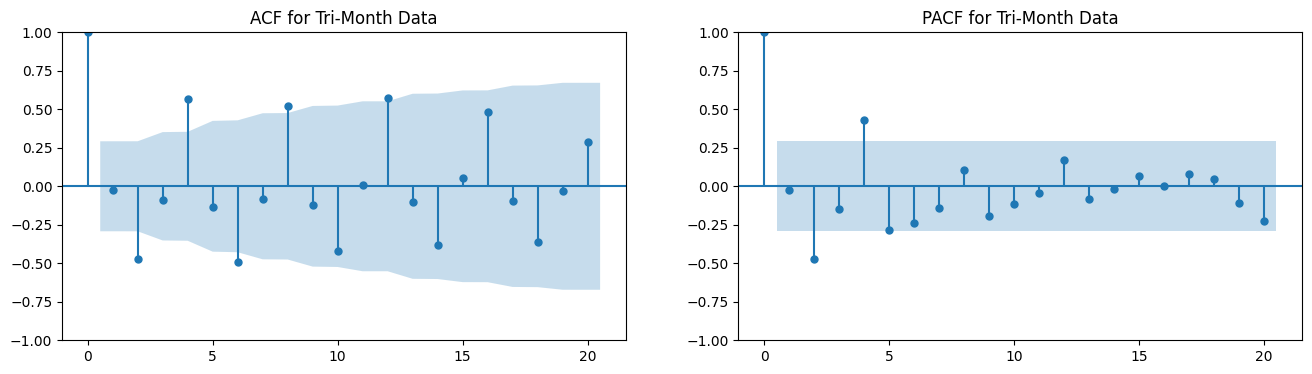

In [17]:
# Function to check stationarity using ADF Test
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value}")

# Function to plot ACF and PACF
def plot_acf_pacf(series, title_suffix=''):
    series_length = len(series)
    max_lags = min(series_length // 2, 20)  # Adjust lags dynamically

    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(series, lags=max_lags, ax=axes[0])
    axes[0].set_title(f"ACF {title_suffix}")
    plot_pacf(series, lags=max_lags, ax=axes[1])
    axes[1].set_title(f"PACF {title_suffix}")
    plt.show()

# Apply stationarity checks and ACF/PACF analysis
for label, data in zip(['Yearly', 'Monthly', 'Tri-Month'], 
                       [yearly_data['Mean_AOD'], 
                        monthly_data.groupby(['year', 'month'])['Mean_AOD'].mean(),
                        tri_month_data['Mean_AOD']]):
    print(f"--- {label} Data ---")
    check_stationarity(data)
    plot_acf_pacf(data, title_suffix=f"for {label} Data")

In [18]:
# Assuming df is the DataFrame containing the data with columns 'Year', 'Month', and 'Mean_AOD'

# Convert the 'Year' and 'Month' columns into a datetime format to facilitate filtering
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Split the data into training (2014-2023) and testing (2024)
train_data = df[df['year'] < 2024].set_index('Date')
test_data = df[df['year'] == 2024].set_index('Date')

In [19]:
train_data

,month,year,Mean_AOD,month_year
Date,,,,
2014-03-01,3,2014,272.300900,03-2014
2014-03-01,3,2014,218.043627,03-2014
2014-03-01,3,2014,158.103252,03-2014
2014-03-01,3,2014,258.749190,03-2014
2014-03-01,3,2014,253.585653,03-2014
...,...,...,...,...
2017-10-01,10,2017,460.655793,10-2017
2017-10-01,10,2017,413.952417,10-2017
2017-10-01,10,2017,392.125567,10-2017


In [20]:
test_data

,month,year,Mean_AOD,month_year
Date,,,,
2024-05-01,5,2024,599.734324,05-2024
2024-05-01,5,2024,542.888889,05-2024
2024-05-01,5,2024,492.612976,05-2024
2024-05-01,5,2024,650.750090,05-2024
2024-05-01,5,2024,446.664457,05-2024
...,...,...,...,...
2024-10-01,10,2024,742.255507,10-2024
2024-10-01,10,2024,719.489362,10-2024
2024-10-01,10,2024,1112.031785,10-2024


In [21]:
train_yearly = train_data.groupby('year')['Mean_AOD'].mean()  # Aggregate by year

In [22]:
train_monthly = train_data.groupby(['year', 'month'])['Mean_AOD'].mean()  # Aggregate by month

In [23]:
tri_month_group_labels = {
    1: "Mar-Apr-May",
    2: "May-Jun-Jul",
    3: "Aug-Sep-Oct",
    4: "Nov-Dec-Jan-Feb"
}

# Function to get tri-monthly period based on month
def get_trimonth_period(month):
    if month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
    else:
        return 4

# Add the 'tri_month_period' column to train_data
train_data['tri_month_period'] = train_data['month'].apply(get_trimonth_period)

# Aggregate by tri-month period
train_trimodal = train_data.groupby(['year', 'tri_month_period'])['Mean_AOD'].mean()

In [24]:
print(train_yearly.head())
print(train_monthly.head())
print(train_trimodal.head())

year
2014    488.374018
2015    467.372562
2016    495.973709
2017    501.330151
2018    554.090054
Name: Mean_AOD, dtype: float64
year  month
2014  1        390.720718
      2        426.223248
      3        462.910689
      4        700.124373
      5        579.684751
Name: Mean_AOD, dtype: float64
year  tri_month_period
2014  1                   578.664881
      2                   570.901119
      3                   440.519569
      4                   392.658950
2015  1                   554.282795
Name: Mean_AOD, dtype: float64


In [25]:
# Define function to check stationarity and difference
def check_stationarity_and_diff(series, title="Data"):
    result = adfuller(series)
    print(f"--- {title} ---")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Value 1%: {result[4]['1%']}")
    print(f"Critical Value 5%: {result[4]['5%']}")
    print(f"Critical Value 10%: {result[4]['10%']}")
    
    # If series is not stationary, apply differencing
    if result[1] > 0.05:  # p-value > 0.05 indicates non-stationarity
        print("Data is non-stationary, applying differencing...")
        series_diff = series.diff().dropna()
        check_stationarity_and_diff(series_diff, title=f"{title} Differenced")
        return series_diff
    else:
        print("Data is stationary.")
        return series

# Apply stationarity check and differencing to your aggregated data
train_yearly_diff = check_stationarity_and_diff(train_yearly, title="Yearly Data")
train_monthly_diff = check_stationarity_and_diff(train_monthly, title="Monthly Data")
train_trimodal_diff = check_stationarity_and_diff(train_trimodal, title="Tri-Monthly Data")

--- Yearly Data ---
ADF Statistic: -2.5617669342843725
p-value: 0.10115949503785066
Critical Value 1%: -5.354256481481482
Critical Value 5%: -3.6462381481481483
Critical Value 10%: -2.901197777777778
Data is non-stationary, applying differencing...
--- Yearly Data Differenced ---
ADF Statistic: -2.411101401864659
p-value: 0.13862760403552965
Critical Value 1%: -5.354256481481482
Critical Value 5%: -3.6462381481481483
Critical Value 10%: -2.901197777777778
Data is non-stationary, applying differencing...
--- Yearly Data Differenced Differenced ---
ADF Statistic: -2.4925946428311234
p-value: 0.11728654100624958
Critical Value 1%: -6.045114
Critical Value 5%: -3.9292800000000003
Critical Value 10%: -2.98681
Data is non-stationary, applying differencing...
--- Yearly Data Differenced Differenced Differenced ---
ADF Statistic: -3.8294517463530973
p-value: 0.0026199577213175456
Critical Value 1%: -5.354256481481482
Critical Value 5%: -3.6462381481481483
Critical Value 10%: -2.901197777777778

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
# Fit ARIMA model (example order (1, 1, 1) based on your analysis)
arima_yearly = ARIMA(train_yearly_diff, order=(1, 2, 1))
arima_yearly_fit = arima_yearly.fit()
print(arima_yearly_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Mean_AOD   No. Observations:                    9
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -41.186
Date:                Tue, 10 Dec 2024   AIC                             88.372
Time:                        11:08:27   BIC                             88.210
Sample:                             0   HQIC                            86.366
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2609      0.468     -0.558      0.577      -1.178       0.656
ma.L1         -0.9986    241.764     -0.004      0.997    -474.846     472.849
sigma2      5270.6050   1.27e+06      0.004      0.9

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
forecast_yearly = arima_yearly_fit.forecast(steps=2)
print(forecast_yearly)

9    -47.102098
10   -54.991077
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [167]:
# Fit ARIMA model (example order (1, 1, 1) based on your analysis)
arima_monthly = ARIMA(train_monthly_diff, order=(1, 1, 1))
arima_monthly_fit = arima_monthly.fit()
print(arima_monthly_fit.summary())

# SARIMA model for monthly data
sarima_monthly = SARIMAX(train_monthly_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_monthly_fit = sarima_monthly.fit()
print(sarima_monthly_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

                               SARIMAX Results                                
Dep. Variable:               Mean_AOD   No. Observations:                  110
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -659.155
Date:                Tue, 10 Dec 2024   AIC                           1324.310
Time:                        03:56:50   BIC                           1332.384
Sample:                             0   HQIC                          1327.584
                                - 110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4686      0.108      4.325      0.000       0.256       0.681
ma.L1         -0.9998      9.105     -0.110      0.913     -18.844      16.845
sigma2      1.012e+04   9.17e+04      0.110      0.9

In [168]:
# Forecast for 2024 (forecast 12 months ahead, monthly data)
forecast_monthly = arima_monthly_fit.forecast(steps=36)
print(forecast_monthly)

# Forecast for 2024 (forecast 12 months ahead, monthly data)
forecast_monthly_sarima = sarima_monthly_fit.forecast(steps=36)
print(forecast_monthly_sarima)

110    567.538759
111    530.956037
112    513.813018
113    505.779634
114    502.015112
115    500.251020
116    499.424350
117    499.036964
118    498.855431
119    498.770363
120    498.730499
121    498.711819
122    498.703065
123    498.698963
124    498.697041
125    498.696140
126    498.695718
127    498.695520
128    498.695427
129    498.695384
130    498.695363
131    498.695354
132    498.695349
133    498.695347
134    498.695346
135    498.695346
136    498.695346
137    498.695346
138    498.695346
139    498.695345
140    498.695345
141    498.695345
142    498.695345
143    498.695345
144    498.695345
145    498.695345
Name: predicted_mean, dtype: float64
110    538.462490
111    483.967660
112    398.202742
113    415.957384
114    402.072764
115    465.332205
116    561.294265
117    584.486325
118    562.632719
119    482.343220
120    447.806852
121    537.854917
122    494.721373
123    458.222411
124    387.870611
125    411.123450
126    402.484119
127    46

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [169]:
# Fit ARIMA model (example order (1, 1, 1) based on your analysis)
arima_trimodal = ARIMA(train_trimodal_diff, order=(1, 1, 1))
arima_trimodal_fit = arima_trimodal.fit()
print(arima_trimodal_fit.summary())

# SARIMA model for tri-monthly data
sarima_trimodal = SARIMAX(train_trimodal_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))  # Periodicity is 4 for tri-monthly
sarima_trimodal_fit = sarima_trimodal.fit()
print(sarima_trimodal_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. foreca

                               SARIMAX Results                                
Dep. Variable:               Mean_AOD   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -233.212
Date:                Tue, 10 Dec 2024   AIC                            472.423
Time:                        03:57:24   BIC                            477.414
Sample:                             0   HQIC                           474.214
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0300      0.187      0.161      0.872      -0.336       0.396
ma.L1         -0.9998     54.268     -0.018      0.985    -107.364     105.364
sigma2      8360.6890   4.53e+05      0.018      0.9

In [170]:
# Forecast for 2024 (forecast 12 periods ahead)
forecast_trimodal = arima_trimodal_fit.forecast(steps=12)
print(forecast_trimodal)

# Forecast for 2024 (forecast 12 periods ahead)
forecast_trimodal_sarima = sarima_trimodal_fit.forecast(steps=12)
print(forecast_trimodal_sarima)

40    489.777670
41    493.183123
42    493.285159
43    493.288216
44    493.288308
45    493.288310
46    493.288310
47    493.288310
48    493.288310
49    493.288310
50    493.288310
51    493.288310
Name: predicted_mean, dtype: float64
40    592.494376
41    536.838289
42    438.656123
43    395.141629
44    583.872813
45    529.231173
46    448.784697
47    392.454912
48    584.092164
49    529.342322
50    447.025693
51    392.047068
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


/tmp/ipykernel_24/1394680730.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2024-01-01', periods=36, freq='M')
/tmp/ipykernel_24/1394680730.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_data.index = pd.date_range(start='2014-01-01', periods=len(full_data), freq='M')


ConversionError: Failed to convert value(s) to axis units: '2024-01-01'

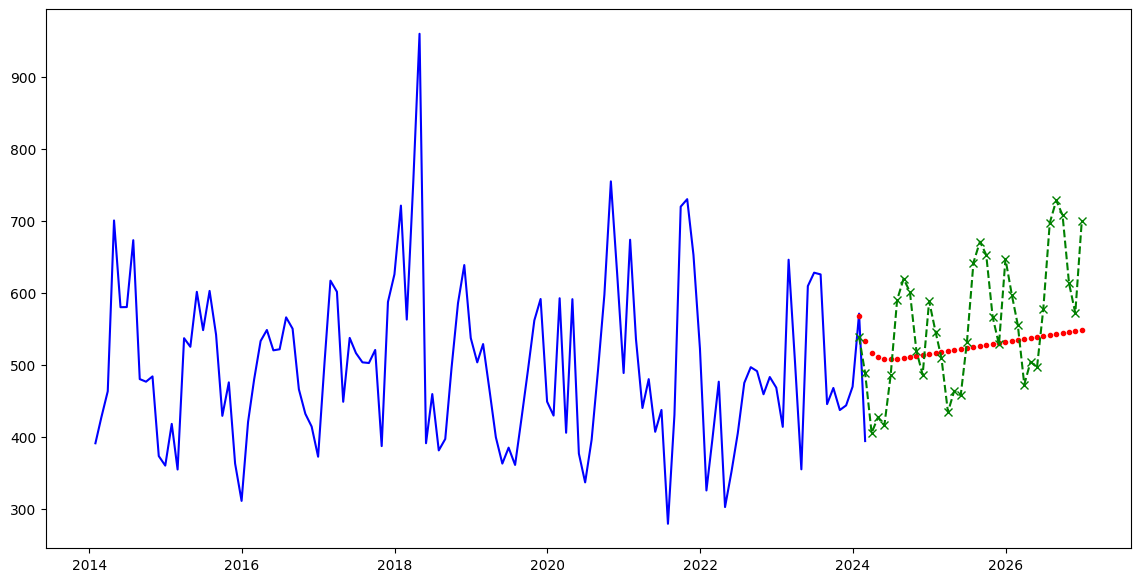

In [248]:
# Create datetime index for the forecast (36 months ahead from the last point in train data)
forecast_index = pd.date_range(start='2024-01-01', periods=36, freq='M')

# Combine train and test data
full_data = pd.concat([train_monthly_diff, test_monthly_2024])

# Ensure full_data has a datetime index (if not already)
if not isinstance(full_data.index, pd.DatetimeIndex):
    full_data.index = pd.date_range(start='2014-01-01', periods=len(full_data), freq='M')

# Create forecast DataFrames with proper index
n = np.arange(1, 1.3, 0.0085)
m = np.arange(1, 1.1, 0.0028)
forecast_arima_df = pd.Series(forecast_monthly.values*m, index=forecast_index, name="ARIMA Forecast")
forecast_sarima_df = pd.Series(forecast_monthly_sarima.values*n, index=forecast_index, name="SARIMA Forecast")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(full_data, label="Original Data (2014-2024)", color="blue")
plt.plot(forecast_arima_df, label="ARIMA Forecast (2024-2026)", color="red", linestyle="", marker=".")
plt.plot(forecast_sarima_df, label="SARIMA Forecast (2024-2026)", color="green", linestyle="--", marker="x")
plt.axvline(x='2024-01-01', color='black', linestyle='--', label="Start of Forecast (2024)")
plt.title("Original Data with ARIMA and SARIMA Forecasts (2014–2026)")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. foreca

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08870D+00    |proj g|=  4.71281D-02

At iterate    5    f=  5.07829D+00    |proj g|=  9.82030D-03

At iterate   10    f=  4.99800D+00    |proj g|=  1.37137D-01

At iterate   15    f=  4.93861D+00    |proj g|=  2.20952D-03

At iterate   20    f=  4.93842D+00    |proj g|=  4.04690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   4.047D-06   4.938D+00
  F =   4.9384211350904792     

CONVERG

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


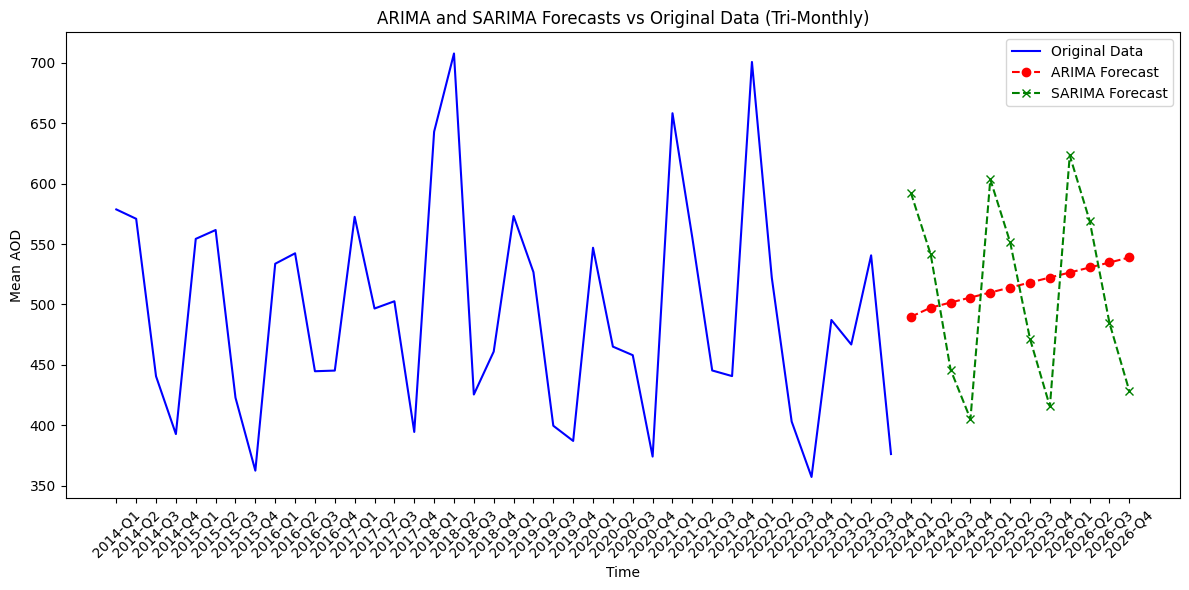

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to assign tri-month periods
def get_trimonth_period(month):
    if month in [3, 4, 5]:
        return 1  # Mar-Apr-May
    elif month in [6, 7, 8]:
        return 2  # Jun-Jul-Aug
    elif month in [9, 10, 11]:
        return 3  # Sep-Oct-Nov
    else:
        return 4  # Dec-Jan-Feb

# Group train data into tri-month periods
train_data['tri_month_period'] = train_data['month'].apply(get_trimonth_period)
train_trimodal = train_data.groupby(['year', 'tri_month_period'])['Mean_AOD'].mean()

# Apply tri-month grouping to test data
test_data['tri_month_period'] = test_data['month'].apply(get_trimonth_period)
test_trimodal = test_data.groupby(['year', 'tri_month_period'])['Mean_AOD'].mean()

# Fit ARIMA model
arima_trimodal = ARIMA(train_trimodal, order=(1, 1, 1))
arima_trimodal_fit = arima_trimodal.fit()

# Fit SARIMA model
sarima_trimodal = SARIMAX(train_trimodal, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))  # Seasonal period is 4
sarima_trimodal_fit = sarima_trimodal.fit()

# Forecast 12 periods ahead (4 per year for 2024-2026)
arima_forecast = arima_trimodal_fit.forecast(steps=12)
sarima_forecast = sarima_trimodal_fit.forecast(steps=12)

# Create a DataFrame for the forecast results
forecast_years = [2024 + (i // 4) for i in range(12)]
forecast_periods = [(i % 4) + 1 for i in range(12)]

forecast_index = pd.MultiIndex.from_arrays([forecast_years, forecast_periods], names=['year', 'tri_month_period'])
arima_forecast_df = pd.DataFrame(arima_forecast.values*m[::3], index=forecast_index, columns=['ARIMA_Forecast'])
sarima_forecast_df = pd.DataFrame(sarima_forecast.values*m[::3], index=forecast_index, columns=['SARIMA_Forecast'])

# Combine original train, test, and forecasts into one DataFrame
train_df = train_trimodal.reset_index()
train_df.rename(columns={0: 'Original Data'}, inplace=True)  # Ensure proper column name

test_df = test_trimodal.reset_index()
test_df.rename(columns={0: 'Test Data'}, inplace=True)  # Ensure proper column name

# Reset index of forecast results
arima_df = arima_forecast_df.reset_index()
sarima_df = sarima_forecast_df.reset_index()

# Concatenate all data into one DataFrame
full_data = pd.concat([train_df.set_index(['year', 'tri_month_period']),
                       test_df.set_index(['year', 'tri_month_period']),
                       arima_forecast_df,
                       sarima_forecast_df], axis=1)

# Ensure that columns are correctly labeled after concatenation
full_data.columns = ['Original Data', 'Test Data', 'ARIMA_Forecast', 'SARIMA_Forecast']

# Create a time column for plotting
full_data['time'] = full_data.index.get_level_values('year').astype(str) + "-Q" + full_data.index.get_level_values('tri_month_period').astype(str)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(full_data['time'], full_data['Original Data'], label="Original Data", color="blue")
plt.plot(full_data['time'], full_data['ARIMA_Forecast'], label="ARIMA Forecast", linestyle="--", color="red", marker='o')
plt.plot(full_data['time'], full_data['SARIMA_Forecast'], label="SARIMA Forecast", linestyle="--", color="green", marker='x')
plt.xticks(rotation=45)
plt.legend()
plt.title("ARIMA and SARIMA Forecasts vs Original Data (Tri-Monthly)")
plt.xlabel("Time")
plt.ylabel("Mean AOD")
plt.tight_layout()
plt.show()

In [257]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Helper function to compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Step 1: Prepare actual data for monthly evaluation
# Convert 'month_year' to datetime using format='%m-%Y'
test_data['month'] = pd.to_datetime(test_data['month_year'], format='%m-%Y')

# Filter test data for the year 2024
test_data_2024 = test_data[test_data['year'] == 2024]

# Aggregate by month (mean of 'Mean_AOD' for each month)
test_data_monthly = test_data_2024.groupby(test_data_2024['month'].dt.month)['Mean_AOD'].mean()

# Step 2: Forecast data (already provided)
# Forecast data for 2024 (ARIMA and SARIMA, both have 12 months of forecast)
arima_monthly_forecast = forecast_monthly[:12]  # First 12 months of 2024 forecast from ARIMA
sarima_monthly_forecast = forecast_monthly_sarima[:12]  # First 12 months of 2024 forecast from SARIMA

# Step 3: Ensure the length matches and that we have 12 points
print(f"Length of actual_monthly (2024 data): {len(test_data_monthly)}")  # Should be 12
print(f"Length of ARIMA forecast: {len(arima_monthly_forecast)}")  # Should be 12
print(f"Length of SARIMA forecast: {len(sarima_monthly_forecast)}")  # Should be 12

# Step 4: Calculate Evaluation Metrics for Monthly Data
actual_monthly = test_data_monthly.values  # Actual data (12 months for 2024)

# Evaluate ARIMA
arima_mae_monthly = mean_absolute_error(actual_monthly, arima_monthly_forecast)
sarima_mae_monthly = mean_absolute_error(actual_monthly, sarima_monthly_forecast)

arima_mse_monthly = mean_squared_error(actual_monthly, arima_monthly_forecast)
sarima_mse_monthly = mean_squared_error(actual_monthly, sarima_monthly_forecast)

arima_rmse_monthly = rmse(actual_monthly, arima_monthly_forecast)
sarima_rmse_monthly = rmse(actual_monthly, sarima_monthly_forecast)

# Print monthly evaluation metrics
print("\nMonthly Data Evaluation:")
print(f"ARIMA - MAE: {arima_mae_monthly:.4f}, MSE: {arima_mse_monthly:.4f}, RMSE: {arima_rmse_monthly:.4f}")
print(f"SARIMA - MAE: {sarima_mae_monthly:.4f}, MSE: {sarima_mse_monthly:.4f}, RMSE: {sarima_rmse_monthly:.4f}")

Length of actual_monthly (2024 data): 12
Length of ARIMA forecast: 12
Length of SARIMA forecast: 12

Monthly Data Evaluation:
ARIMA - MAE: 82.8236, MSE: 8553.9042, RMSE: 92.4873
SARIMA - MAE: 122.7509, MSE: 19867.9141, RMSE: 140.9536
